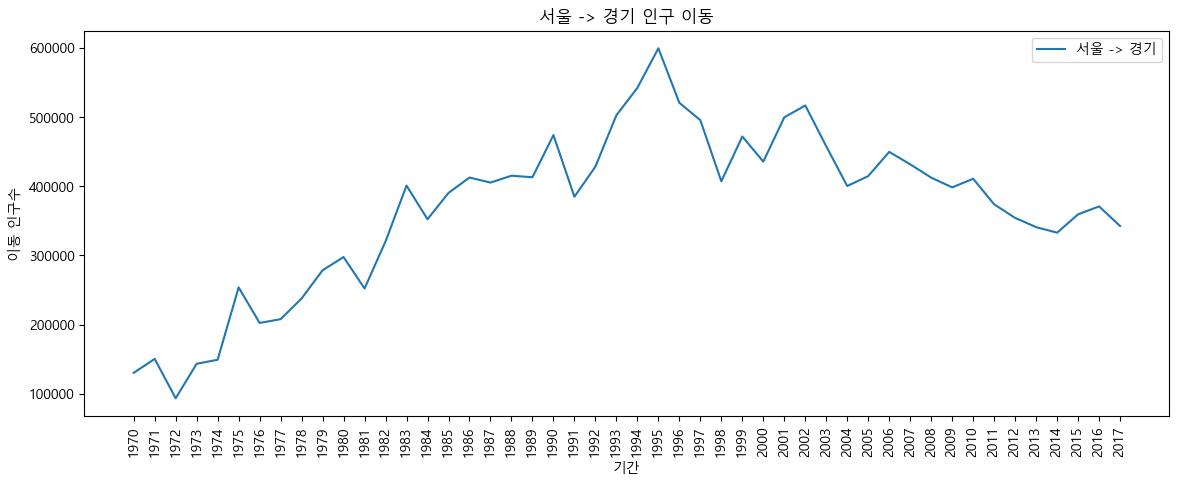

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

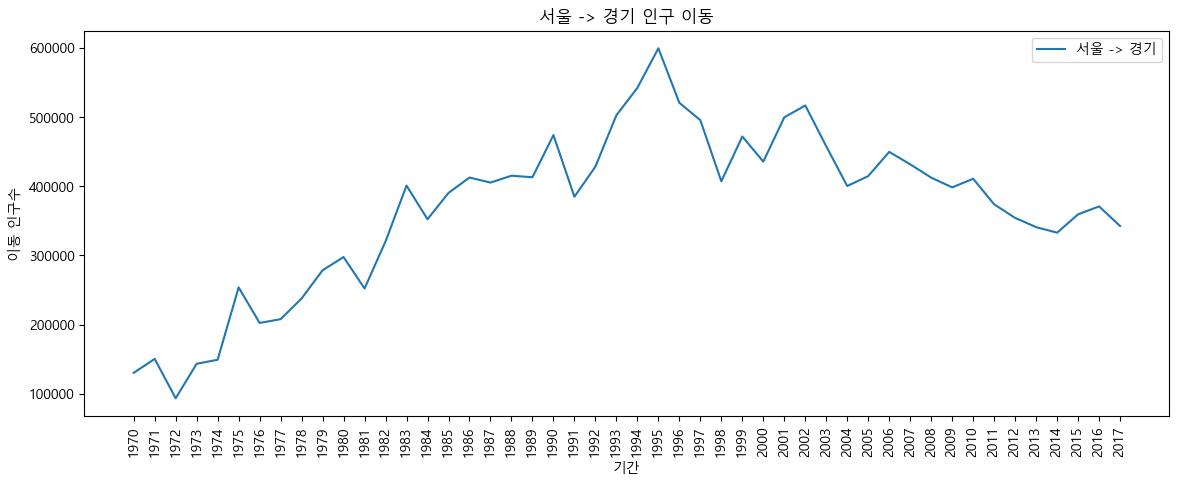

In [2]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [3]:
# 경기 -> 서울
import pandas as pd
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
# 1. head() 대략적으로 데이터를 확인
# 2. 데이터의 정보확인  info() describe()
# 3. 결측치 여부 확인
# 결측치가 확인되면 drop fillna  선택
df['전출지별'] = df['전출지별'].ffill()  # 결측치 대처, 문자열이고 병합된 컬럼의 정보가 na로 표기되어서 앞의 문자열로 대처
# df.info()
df.isna().sum().values.sum()  # 결측치 확인
pd.to_numeric(df.loc[1:,'1970'],errors='coerce')  # 문자형숫자 ->숫자로 변경하는데. 변경불가능한 데이터는 결측치로 대처

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [4]:
mask = (df['전출지별'] == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]
df2

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,경기도,서울특별시,95388,95423,90470,107177,107518,207641,144524,154021,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


In [5]:
df2.isna().sum().values.sum() #결측치 없음
df3 = df2.iloc[:,2:]
df3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,95388,95423,90470,107177,107518,207641,144524,154021,164771,168188,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


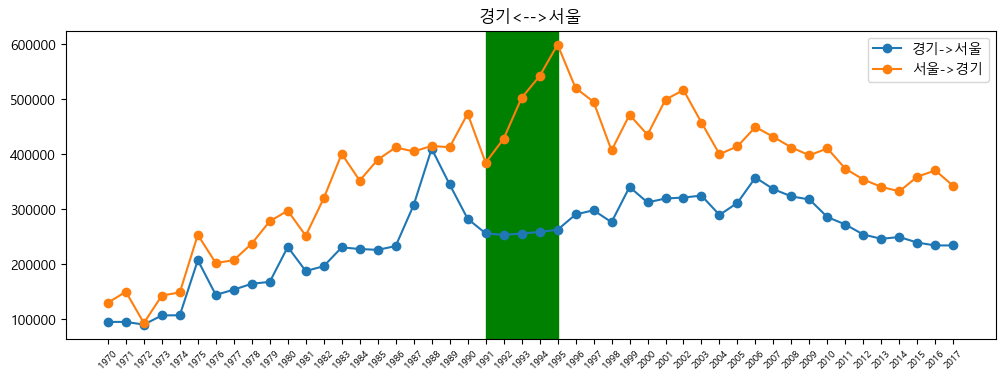

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기<-->서울")

plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울',marker='o' )   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기",marker='o')           # 서울 -> 경기

plt.legend(loc='best')

plt.axvspan('1991','1995',color = 'green')
plt.xticks(rotation=45,fontsize = 7)
plt.show()

In [40]:
# 1991 ~ 1995 데이터를 추출해서 gpt를 통해 인구이동에대한 추론
print(df3.loc[:,'1991':'1995'])

sr_one['1991':'1995']

       1991    1992    1993    1994    1995
164  256270  253605  256049  258897  262893


1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
Name: 경기도, dtype: object

In [ ]:
너는 데이터 분석 전문가
우리는 다음데이터를 통해서 실제 어떤 사건이 일어났는지 
과거 정보를 조회해서 추론해줘

1. 경기에서 서울로 유입된 년도별 인구수
 1991    1992    1993    1994    1995
256270  253605  256049  258897  262893

2. 서울에서 경기로 유입된 년도별 인구수
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411

시각화로 확인했을때 서울에서 경기도로 이동한 인구가 급격히 증가하는 패턴을 보이는데

해당 이유에 대해서 각종 자료를검색해서 정확하게 정보를 찾아줘


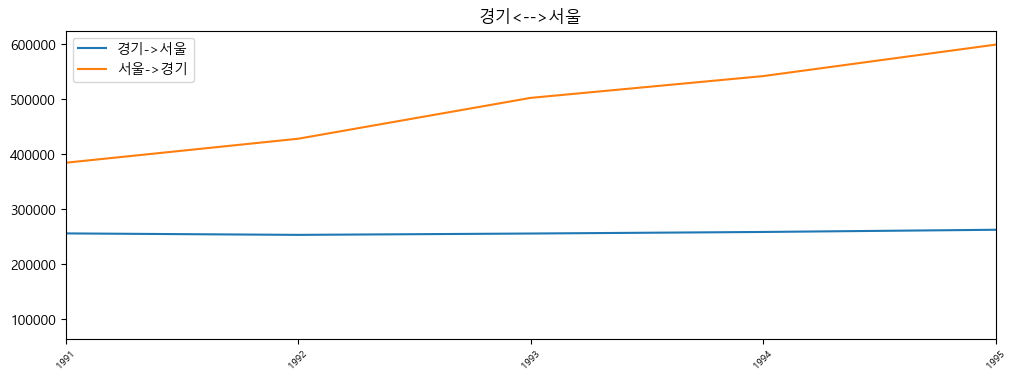

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기<-->서울")

plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울' )   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기")           # 서울 -> 경기

plt.xlim('1991','1995')

plt.legend(loc='best')

plt.xticks(rotation=45,fontsize = 7)
plt.show()

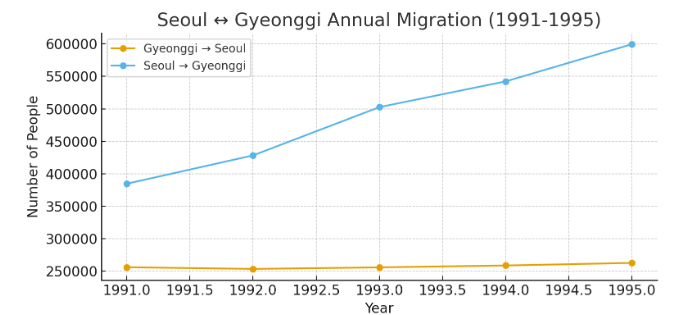


1990년대 초·중반 정부의 ‘1기 신도시(분당·일산 등)’ 대규모 주택공급 정책이 경기지역(서울 주변)에 집중되면서 대규모 인구 유입이 발생했습니다. 

신도시 개발로 경기권에 대규모 아파트·주거단지가 생기자 주택비용·주거여건 때문에 서울 거주민이 경기로 이주했습니다(‘베드타운’ 성격이 강했음). 


**1990년대 중반에 걸친 광역교통망(지하철·통근철도 확장, 예: 분당선 1994년 개통 등)** 이 통근을 현실적으로 가능하게 만들어 서울에 직장 두고 경기도에 거주하는 패턴을 촉진했습니다. 

서울의 토지·주택 규제(그린벨트·도시계획)와 상대적 주거비 상승은 외곽(경기)으로의 전출을 부추겼습니다. (신도시 정책은 서울의 주택난 해소 목적도 포함) 


통계적으로 1990년대 전반 경기(경기도) 인구증가율이 전국·서울보다 훨씬 높았음 — 신도시(5개) 중심으로 연평균 매우 높은 성장률을 보였다는 연구·통계가 존재합니다. 

세부 근거(근거별로 주요 포인트와 출처)

1) 1기 신도시(분당·일산·평촌·산본·중동 등)의 건설

1990년대 초반 정부가 서울의 주택난을 완화하기 위해 수도권 근교에 **신도시** 를 대규모로 조성했고, 이들 신도시는 빠른 인구유입을 기록했습니다. 신도시가 생기자 많은 서울 거주민이 신축 아파트 중심의 경기지역으로 이주했습니다. 


2) 분당 등 사례(구체적 타임라인)

분당신도시 조성은 1989~1991년대 초에 걸쳐 본격화되었고, 분당을 염두에 둔 광역철도(분당선)와 연계되면서 1990년대 중반부터 주민유입·정착이 두드러졌습니다. **(분당선: 1994년 개통)** — 이는 ‘1991→1995’ 사이 서울→경기 이동량이 크게 늘어난 시기와 겹칩니다. 

3) 교통망 확충(통근 현실화)

1990년대에 서울 메트로·광역철도 확장이 대규모로 진행되어(1990년대에 약 160km 신규 노선 등) **경기도 신도시와 서울을 연결하는 통근여건이 획기적으로 개선** 되었습니다. 통근 가능성이 늘어나자 **직장은 서울, 주거는 경기** 패턴이 확산됐습니다. 


4) 주택·토지정책과 비용(유인요인)

서울은 그린벨트·토지공급 제한 등으로 신규 주택공급 여력이 제한적이었고, 서울 내 주택가격·전세난 문제를 완화하려는 목적도 신도시 개발의 핵심 동기였습니다. 신도시 쪽이 새 아파트(대단지) 공급으로 주거매력도가 높았고, 단지별 편의시설 확대 등 삶의 질 요인도 작용했습니다. 

5) 통계적 배경 — 경기 인구 급증

연구·연보(국가·지방 통계 등)는 1990년대 경기도의 인구증가율이 전국 평균보다 크게 높았음을 보고합니다. 신도시 5곳의 연평균 인구증가율이 매우 높은 사례(예: 연평균 10%대)를 기록했다는 연구도 있습니다. 이는 사용자가 주신 ‘서울→경기’ 급증 숫자와 일치하는 큰 맥락입니다. 

사용자 데이터(차트)에 대한 해석 (짧게)

제공하신 숫자에서 1991→1995 사이 **서울→경기 유입이 약 384k → 599k (약 56% 증가)**로 매우 큰 폭으로 늘었습니다. 반면 경기→서울은 256k→263k 정도로 거의 변화 없음.

이는 **‘순이동 방향이 서울에서 경기 쪽으로 크게 바뀌었다’**는 결론을 강하게 지지합니다. 가장 설득력 있는 설명은 (A) 신도시 주택공급 확대 + (B) 교통망 개선 → 통근 가능한 베드타운화 입니다. 위의 정책·교통·통계 근거들이 이 설명을 뒷받침합니다. 

In [ ]:
##